<a href="https://colab.research.google.com/github/kyendjapasboroallo/campus-recruitment-data-science/blob/main/UAS_DATA_SCIENCE_KYEN_DJAPAS_BOROALLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Campus Recruitment.csv to Campus Recruitment.csv


In [ ]:
import os
os.listdir()

['.config', 'Campus Recruitment.csv', 'sample_data']

In [ ]:
import pandas as pd

df = pd.read_csv("Campus Recruitment.csv")
df.head()

,ID,Jenis Kelamin,Nilai rata-rata SMP,Lembaga pendidikan kelas 10,Nilai rata-rata SMA,Lembaga pendidikan kelas 12,Jurusan saat SMA,IPK,Program studi sarjana,Pengalaman kerja sebelum lulus,Nilai tes kemampuan kerja,Pendidikan pascasarjana,Nilai rata-rata pascasarjana,status kelulusan (Bekerja/Belum),Gaji
0,1,M,67.00,Internasional,91.00,Internasional,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,5400000.0
1,2,M,79.33,Negeri,78.33,Negeri,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,4000000.0
2,3,M,65.00,Negeri,68.00,Swasta,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,5000000.0
3,4,M,56.00,Negeri,52.00,Swasta,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Negeri,73.60,Negeri,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,8500000.0


In [ ]:
df.isnull().sum()

,0
ID,0
Jenis Kelamin,1
Nilai rata-rata SMP,2
Lembaga pendidikan kelas 10,0
Nilai rata-rata SMA,1
Lembaga pendidikan kelas 12,0
Jurusan saat SMA,0
IPK,0
Program studi sarjana,0
Pengalaman kerja sebelum lulus,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Drop kolom yang tidak dipakai
df_model = df.drop(columns=['ID', 'Gaji'])

# Encode variabel kategorikal
le = LabelEncoder()
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        df_model[col] = le.fit_transform(df_model[col])

# Pisahkan fitur dan target
X = df_model.drop(columns=['status kelulusan (Bekerja/Belum)'])
y = df_model['status kelulusan (Bekerja/Belum)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.813953488372093

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.85      0.90      0.88        31

    accuracy                           0.81        43
   macro avg       0.77      0.74      0.76        43
weighted avg       0.81      0.81      0.81        43

Confusion Matrix:
 [[ 7  5]
 [ 3 28]]


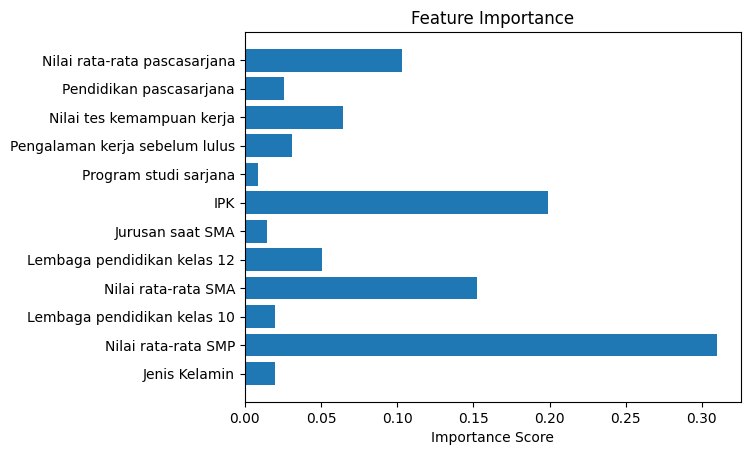

In [ ]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.figure()
plt.barh(features, importances)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()